In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, 0.001)
model.add_layer(DenseLayer(1, 8, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(3, 3, True, afn=softmax, dafn=None, rfn=None))

In [4]:
# optimizer
ga = GA(
    dict(
        m = 200,
        x_rate = [0.3, 0.5],
        m_rate = [0.2, 0.6],
        weight_constraint = [-3.,3.],
        radioactive_rating = [0.1, 0.5],
        grow_factor = [0.1, 0.5]))

In [5]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = ga, \
    metrics = ['accuracy', 'mean_square_error', 'essential_metrics','categorical_crossentropy'])

building layer 1 with 5
48
building layer 2 with 8
36
building layer 3 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\tcumi\\github_repo\\neural-network\\', 'dataset')
GROUP = 5
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 300
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)


In [8]:
# learning phase
history = model.fit(x_train, y_train, EPOCHS)

to refresh 0
Iteration 150/300: 	0.5882172272584149
update global 0.5882172272584149
update global 0.5880899161935966
came in: 324
to refresh 0
Iteration 151/300: 	0.5880899161935966
update global 0.5880899161935966
update global 0.5875301539340866
came in: 319
to refresh 0
Iteration 152/300: 	0.5875301539340866
update global 0.5875301539340866
came in: 304
to refresh 0
Iteration 153/300: 	0.5875301539340866
update global 0.5875301539340866
came in: 328
to refresh 1
Iteration 154/300: 	0.5875301539340866
update global 0.5875301539340866
update global 0.5874609189612843
update global 0.5874495105208638
update global 0.5873465136946919
update global 0.5872885445568049
came in: 321
to refresh 0
Iteration 155/300: 	0.5872885445568049
update global 0.5872885445568049
update global 0.5872313240978205
update global 0.5871131397853387
update global 0.5871026226293261
came in: 330
to refresh 1
Iteration 156/300: 	0.5871026226293261
update global 0.5871026226293261
update global 0.58691976672021

In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for y in y_list:
        ax.plot(x, y)
    if x_label is not None and y_label is not None and title is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title=title)
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()



In [10]:
print(history)

[0.7364191786151066, 0.7364191786151066, 0.7364191786151066, 0.6726746603707286, 0.6726746603707286, 0.6726746603707286, 0.6726746603707286, 0.6726746603707286, 0.6726746603707286, 0.6726746603707286, 0.6701761406158733, 0.6687527237651504, 0.6687527237651504, 0.6687527237651504, 0.6687527237651504, 0.6676278515396831, 0.6676278515396831, 0.6527727786625657, 0.6523021804952176, 0.6464930739358207, 0.6439538403092143, 0.6439538403092143, 0.6307561999169465, 0.6306628646137559, 0.6306628646137559, 0.6255386922961084, 0.6250315871194144, 0.6234727663414501, 0.6146799247955608, 0.6146760031441661, 0.6073284683940566, 0.6073284683940566, 0.6073284683940566, 0.6073284683940566, 0.6073284683940566, 0.6073284683940566, 0.6073284683940566, 0.6073284683940566, 0.6073284683940566, 0.6073284683940566, 0.6071226886499708, 0.6071226886499708, 0.6071226886499708, 0.6071226886499708, 0.607068926374489, 0.607068926374489, 0.607068926374489, 0.607068926374489, 0.6069548419702833, 0.606311548536069, 0.60

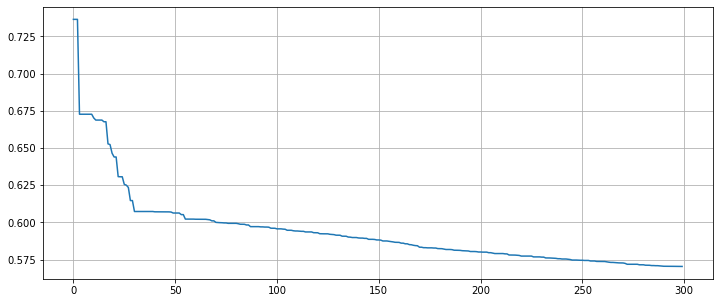

In [11]:
draw_plot(x = [i for i in range(len(history))], y_list = [history], x_label = 'Epochs', \
    y_label = model.loss_fn)

In [12]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [[0.94030577]
 [0.02340006]
 [0.03629425]]
[1. 0. 0.] <-> [[0.653855  ]
 [0.23370315]
 [0.11244182]]
[1. 0. 0.] <-> [[0.9515972 ]
 [0.0243162 ]
 [0.02408663]]
[1. 0. 0.] <-> [[0.6036478 ]
 [0.2630669 ]
 [0.13328524]]
[1. 0. 0.] <-> [[0.9344045 ]
 [0.04485645]
 [0.02073913]]
[0. 0. 1.] <-> [[0.93927777]
 [0.02350233]
 [0.03721989]]
[0. 1. 0.] <-> [[0.09845766]
 [0.3861742 ]
 [0.51536816]]
[0. 1. 0.] <-> [[0.32331353]
 [0.38781226]
 [0.2888742 ]]
[1. 0. 0.] <-> [[0.70797163]
 [0.20070235]
 [0.09132606]]
[1. 0. 0.] <-> [[0.8202651 ]
 [0.12775673]
 [0.05197813]]
[1. 0. 0.] <-> [[0.91829115]
 [0.05826472]
 [0.02344419]]
[0. 1. 0.] <-> [[0.58824664]
 [0.27182382]
 [0.1399295 ]]
[0. 0. 1.] <-> [[0.0830269 ]
 [0.37649247]
 [0.5404806 ]]
[1. 0. 0.] <-> [[0.9457751 ]
 [0.02304086]
 [0.03118404]]
[1. 0. 0.] <-> [[0.9030227 ]
 [0.02833242]
 [0.06864489]]
[0. 0. 1.] <-> [[0.29725426]
 [0.39428315]
 [0.30846256]]
[1. 0. 0.] <-> [[0.3966131 ]
 [0.36463568]
 [0.23875126]]
[1. 0. 0.] <->